In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mall-customers-segmentation/Mall_Customers.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import silhouette_score, davies_bouldin_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("/kaggle/input/mall-customers-segmentation/Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df['Genre'].unique()

array(['Male', 'Female'], dtype=object)

In [8]:
df['Genre'] = df['Genre'].map({'Male': 0, "Female":1})

In [9]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


In [10]:
df.drop('CustomerID', axis=1, inplace=True)
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


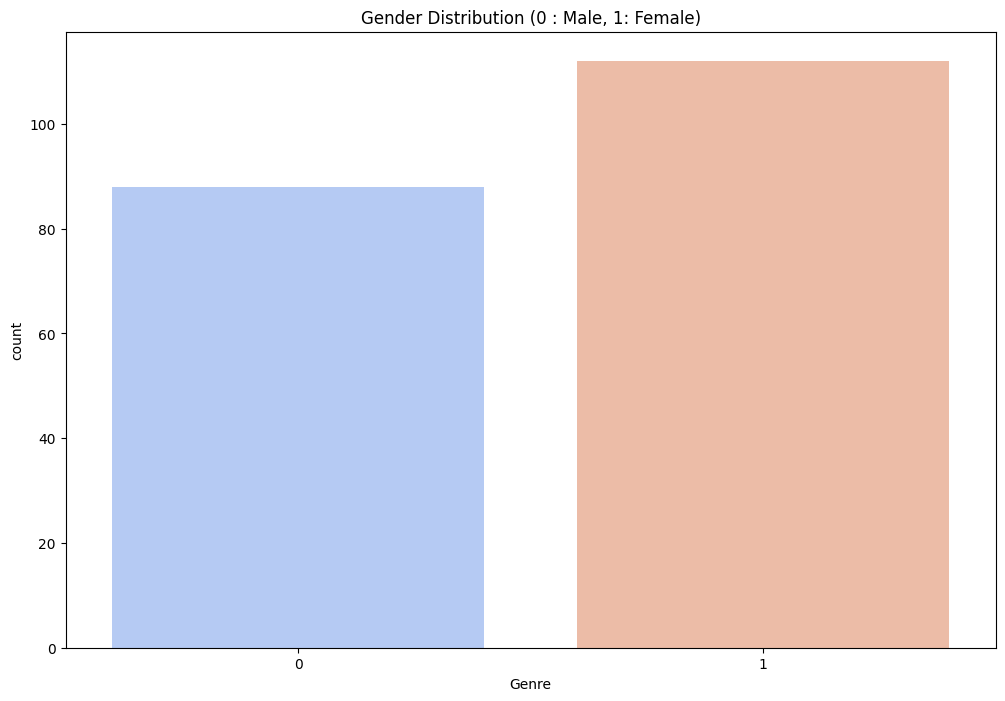

In [11]:
plt.figure(figsize=(12,8))
sns.countplot(x= 'Genre', data=df, palette='coolwarm')
plt.title("Gender Distribution (0 : Male, 1: Female)")
plt.show()

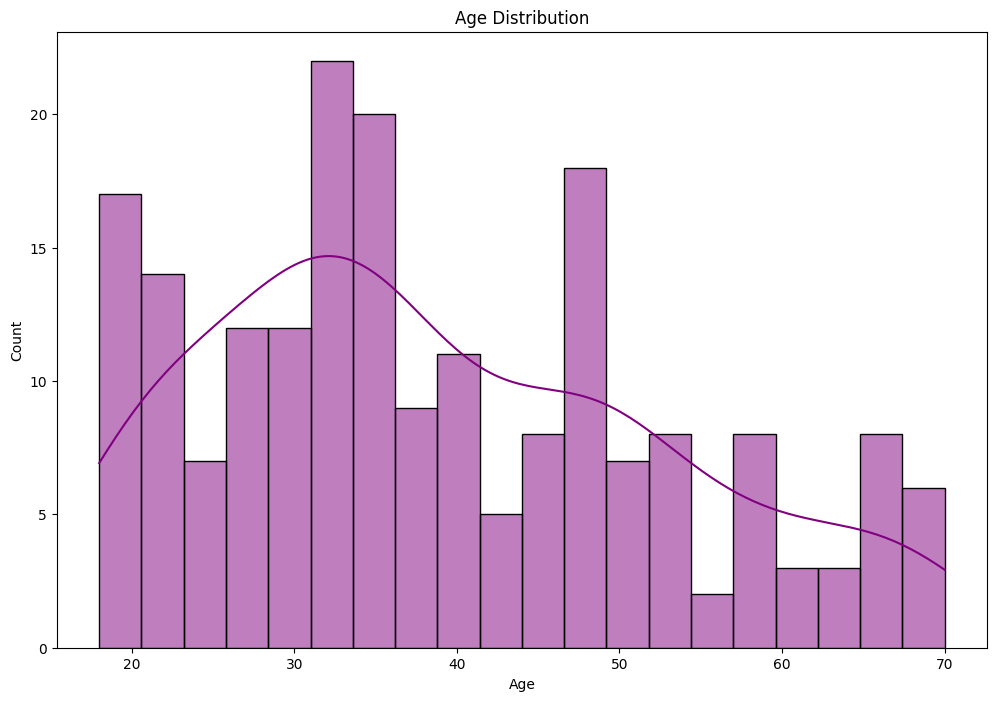

In [12]:
plt.figure(figsize=(12,8))
sns.histplot(df['Age'], kde=True, bins=20, color='purple')
plt.title("Age Distribution")
plt.show()

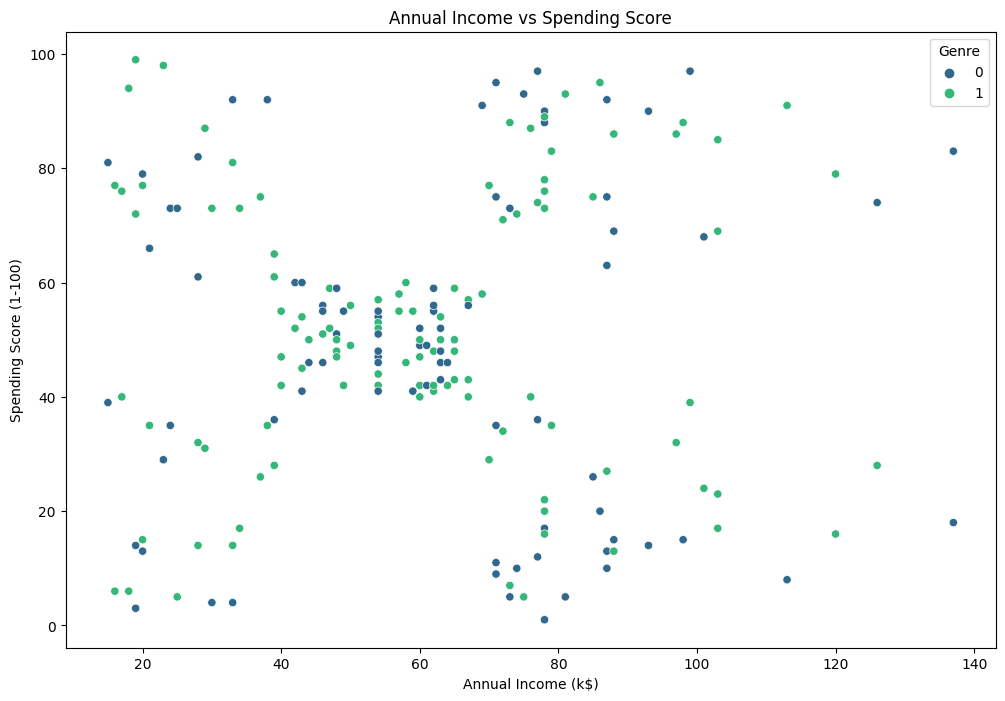

In [13]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=df['Genre'], palette='viridis')
plt.title("Annual Income vs Spending Score")
plt.show()

In [14]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [15]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Convert back to DataFrame
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])


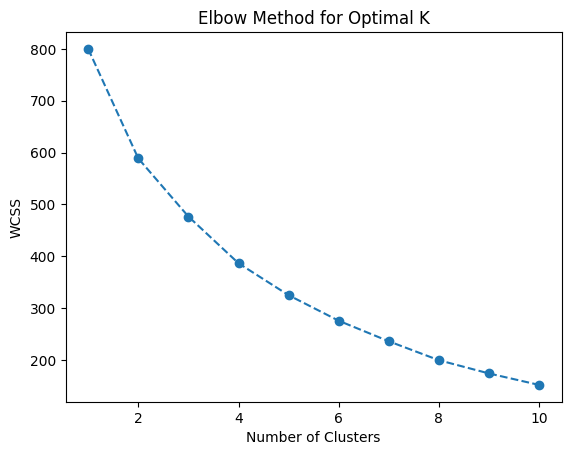

In [16]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss, marker='o', linestyle='--')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal K")
plt.show()

In [17]:
kmeans = KMeans(n_clusters=5, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(df_scaled)

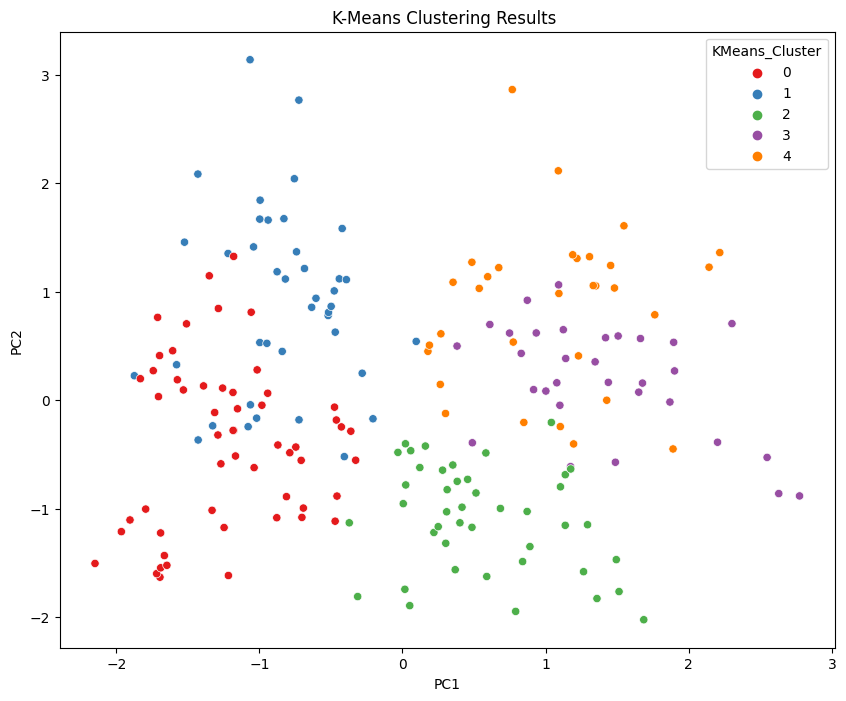

In [18]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=df_pca['PC1'], y=df_pca['PC2'], hue=df['KMeans_Cluster'], palette='Set1')
plt.title('K-Means Clustering Results ')
plt.show()

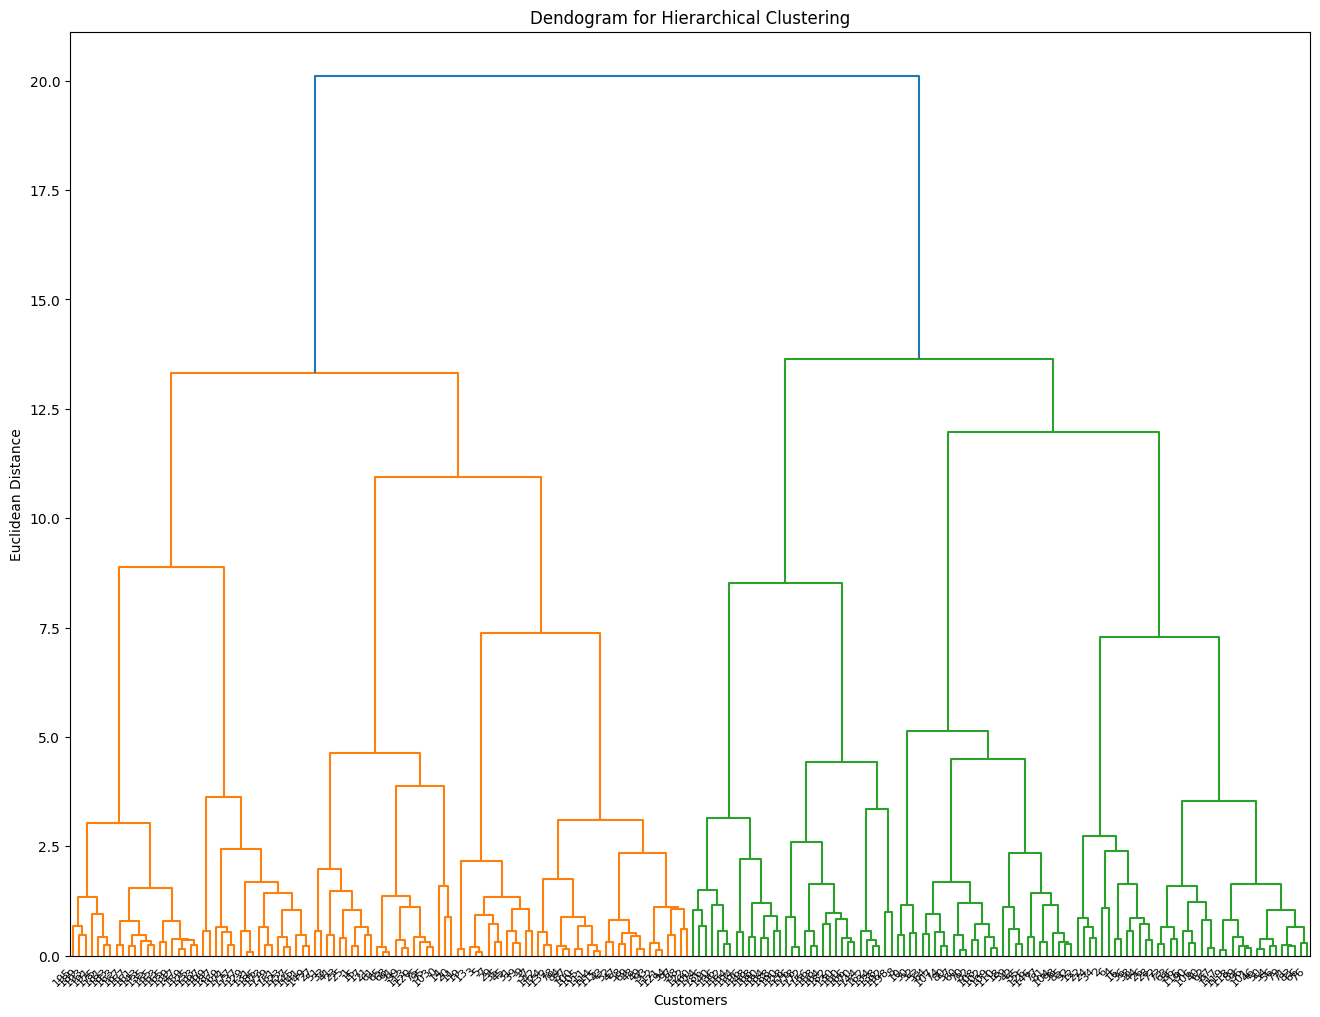

In [19]:
plt.figure(figsize=(16,12))
dendrogram(linkage(df_scaled, method='ward'))
plt.title("Dendogram for Hierarchical Clustering")
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.show()

In [20]:
hierarchical = AgglomerativeClustering(n_clusters=5)
df['Hierarchical_Cluster'] = hierarchical.fit_predict(df_scaled)

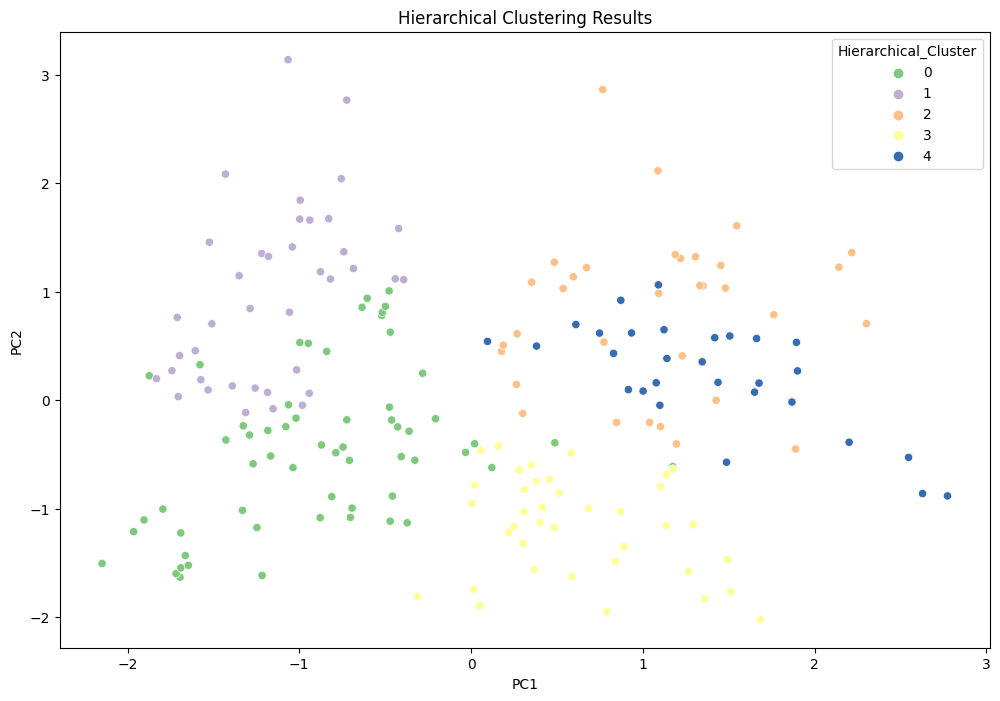

In [21]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=df_pca['PC1'], y=df_pca['PC2'], hue=df['Hierarchical_Cluster'], palette='Accent')
plt.title('Hierarchical Clustering Results')
plt.show()

In [22]:
dbscan = DBSCAN(eps=1.5, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(df_scaled)

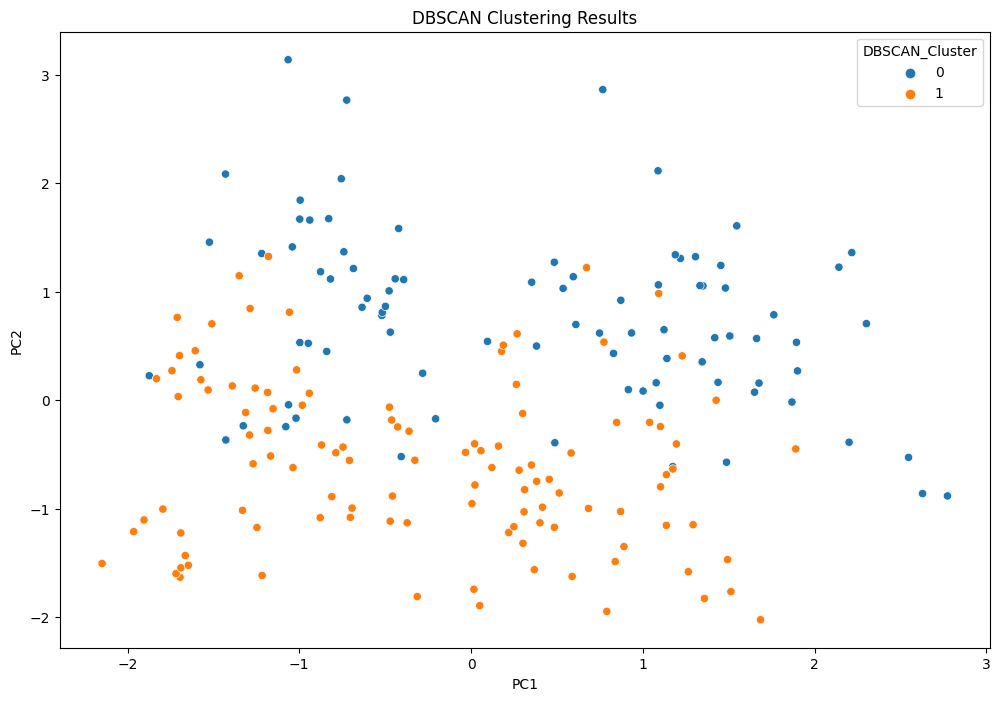

In [23]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=df_pca['PC1'], y=df_pca['PC2'], hue=df['DBSCAN_Cluster'], palette='tab10')
plt.title("DBSCAN Clustering Results")
plt.show()

In [24]:
print('K-Means Silhouette Score:', silhouette_score(df_scaled, df['KMeans_Cluster']))
print('Hierarchical Silhouette Score:', silhouette_score(df_scaled, df['Hierarchical_Cluster']))
print("DBSCAN Silhouette Score:", silhouette_score(df_scaled, df['DBSCAN_Cluster']))

K-Means Silhouette Score: 0.31709067955763137
Hierarchical Silhouette Score: 0.28699413201651747
DBSCAN Silhouette Score: 0.2776035125578272


In [25]:
print("K-Means Davies-Bouldin Score:", davies_bouldin_score(df_scaled, df['KMeans_Cluster']))
print("Hierarchical Davies-Bouldin Score:", davies_bouldin_score(df_scaled, df['Hierarchical_Cluster']))


K-Means Davies-Bouldin Score: 1.150598753335643
Hierarchical Davies-Bouldin Score: 1.2197730790225614


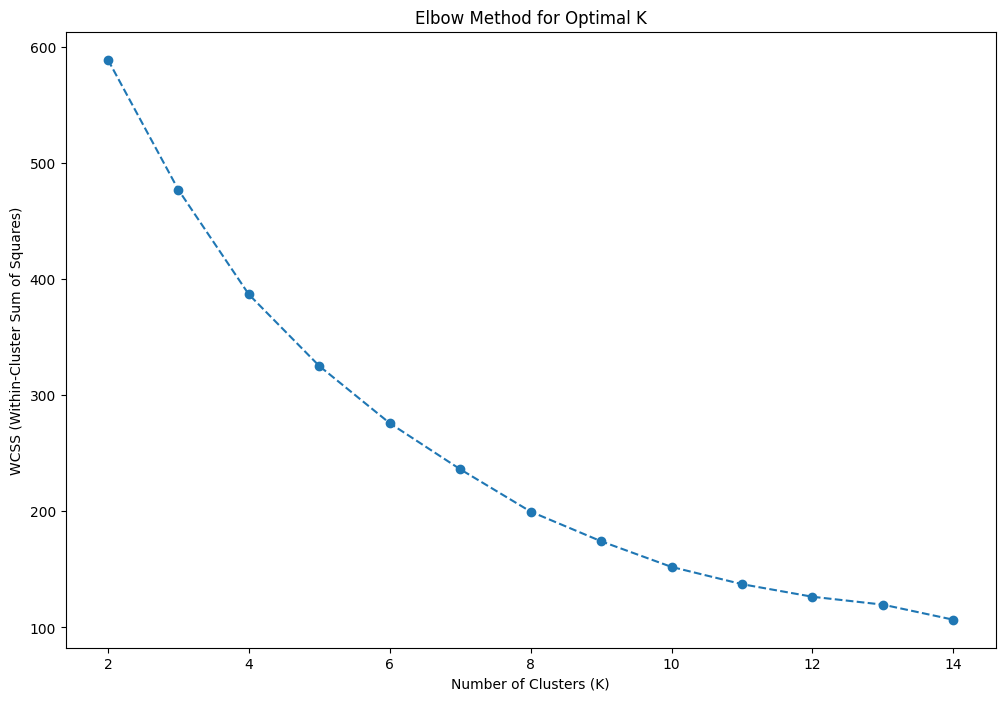

In [26]:
wcss = []
K_range = range(2, 15)  

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(12, 8))
plt.plot(K_range, wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal K')
plt.show()


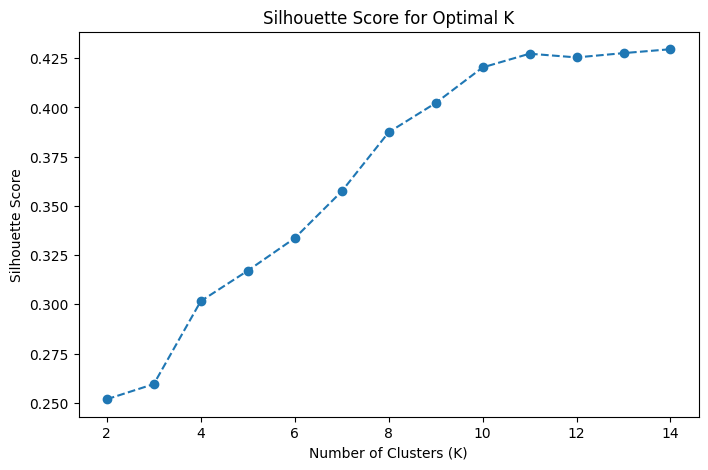

In [27]:
silhouette_scores = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df_scaled)
    silhouette_scores.append(silhouette_score(df_scaled, labels))


plt.figure(figsize=(8, 5))
plt.plot(K_range, silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal K')
plt.show()


In [28]:
optimal_K = [5, 9, 10]

for k in optimal_K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df_scaled)
    score = silhouette_score(df_scaled, labels)
    print(f"Silhouette Score for K={k}: {score}")


Silhouette Score for K=5: 0.31709067955763137
Silhouette Score for K=9: 0.40225202468243715
Silhouette Score for K=10: 0.4203423769946011


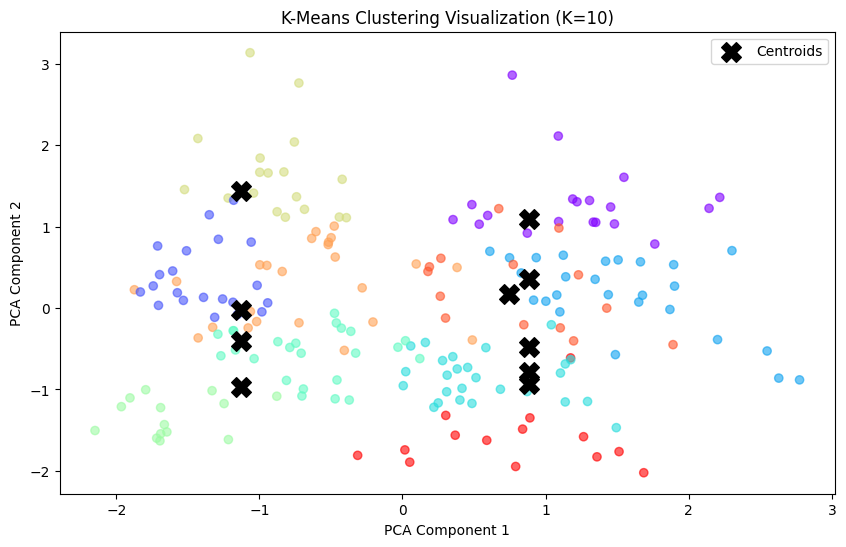

In [29]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df_scaled)


kmeans = KMeans(n_clusters=10, random_state=42)
labels = kmeans.fit_predict(df_scaled)


plt.figure(figsize=(10,6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='rainbow', alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='black', marker='X', label="Centroids")
plt.title("K-Means Clustering Visualization (K=10)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()

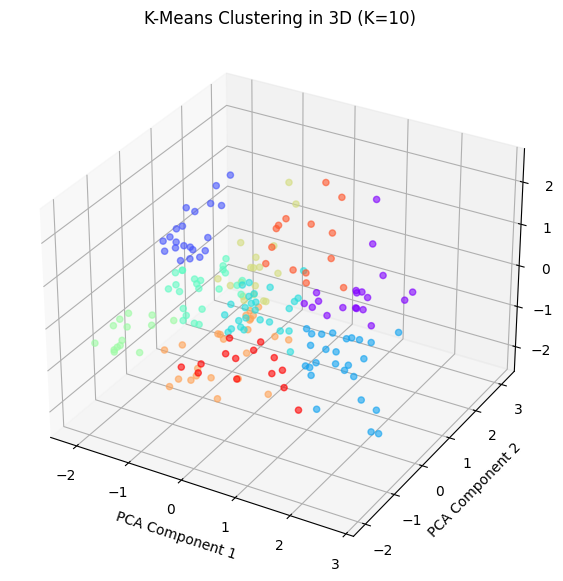

In [30]:
from mpl_toolkits.mplot3d import Axes3D

pca_3d = PCA(n_components=3)
reduced_data_3d = pca_3d.fit_transform(df_scaled)

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')


ax.scatter(reduced_data_3d[:, 0], reduced_data_3d[:, 1], reduced_data_3d[:, 2], c=labels, cmap='rainbow', alpha=0.6)
ax.set_title("K-Means Clustering in 3D (K=10)")
ax.set_xlabel("PCA Component 1")
ax.set_ylabel("PCA Component 2")
ax.set_zlabel("PCA Component 3")

plt.show()

In [31]:
unique, counts = np.unique(labels, return_counts=True)
cluster_distribution = dict(zip(unique, counts))

print("Cluster Distribution:", cluster_distribution)

Cluster Distribution: {0: 19, 1: 21, 2: 26, 3: 26, 4: 24, 5: 14, 6: 18, 7: 24, 8: 14, 9: 14}


In [32]:
from sklearn.metrics import davies_bouldin_score

db_score = davies_bouldin_score(df_scaled, labels)
print("Davies-Bouldin Score for K=10:", db_score)


Davies-Bouldin Score for K=10: 0.8337572775954565


In [33]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

kmeans_8 = KMeans(n_clusters=8, random_state=42)
labels_8 = kmeans_8.fit_predict(df_scaled)

# Compute Scores
silhouette_8 = silhouette_score(df_scaled, labels_8)
db_score_8 = davies_bouldin_score(df_scaled, labels_8)

print("Silhouette Score for K=8:", silhouette_8)
print("Davies-Bouldin Score for K=8:", db_score_8)


Silhouette Score for K=8: 0.3873969164416462
Davies-Bouldin Score for K=8: 0.9474455399113741


In [34]:
df.to_csv("mall customer segmentation.csv")